## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Importing & Loading the dataset

In [2]:
df=pd.read_csv("data_1.csv")
df

,Date,Cloud factor,Soil moisture,Temperature,Humidity,Symptoms
0,01-08-2016,Broken,Adequate,Moderate,Maximum,Low
1,02-08-2016,Open,Adequate,Moderate,Maximum,Low
2,03-08-2016,Open,Adequate,Moderate,Maximum,Low
3,04-08-2016,Open,Adequate,Moderate,Maximum,Low
4,05-08-2016,Open,Adequate,Moderate,Maximum,Low
...,...,...,...,...,...,...
883,27-03-2020,Open,Adequate,Moderate,Moderate,High
884,28-03-2020,Closed,Adequate,Moderate,Moderate,High
885,29-03-2020,Closed,Adequate,Moderate,Moderate,High
886,30-03-2020,Closed,Adequate,Moderate,Moderate,High


## Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0     Date           888 non-null    object
 1    Cloud factor    888 non-null    object
 2    Soil moisture   888 non-null    object
 3   Temperature      888 non-null    object
 4    Humidity        888 non-null    object
 5   Symptoms         888 non-null    object
dtypes: object(6)
memory usage: 41.8+ KB


## Dataset Description:

In [4]:
df.describe()

,Date,Cloud factor,Soil moisture,Temperature,Humidity,Symptoms
count,888,888,888,888,888,888
unique,887,3,2,3,3,3
top,30-10-2019,Open,Adequate,Moderate,Moderate,High
freq,2,390,884,459,398,448


In [5]:
list(df.columns)

['  Date ',
 ' Cloud factor ',
 ' Soil moisture ',
 'Temperature ',
 ' Humidity',
 'Symptoms ']

## Counting the classes of features 

In [6]:
df['Temperature '].value_counts()

Moderate    459
Minimum     344
Maximum      85
Name: Temperature , dtype: int64

In [7]:
df[' Cloud factor '].value_counts()

Open      390
Broken    267
Closed    231
Name:  Cloud factor , dtype: int64

In [8]:
df[' Soil moisture '].value_counts()

 Adequate      884
 Inadequate      4
Name:  Soil moisture , dtype: int64

In [9]:
df[' Humidity'].value_counts()

Moderate    398
Minimum     282
Maximum     208
Name:  Humidity, dtype: int64

In [10]:
df['Symptoms '].value_counts()

High      448
Medium    424
Low        16
Name: Symptoms , dtype: int64

## Checking the Missing Values

In [11]:
df.isnull().sum()

  Date             0
 Cloud factor      0
 Soil moisture     0
Temperature        0
 Humidity          0
Symptoms           0
dtype: int64

## Exploratory Data Analyis

## Comparison between Cloud Factor and Symptoms:

C:\Users\Konderu Bhavani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Symptoms        High  Low  Medium
 Cloud factor                    
Broken           222    1      44
Closed           125    3     103
Open             101   12     277


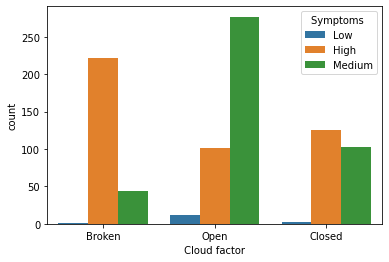

In [12]:
sns.countplot(df[' Cloud factor '],hue=df['Symptoms '])
print(pd.crosstab(df[' Cloud factor '],df['Symptoms ']))

Here, we can see the chances of getting powdery mildew disease is high when the cloud is broken and closed

## Comparison between Soil Moisture and Symptoms:

C:\Users\Konderu Bhavani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Symptoms         High  Low  Medium
 Soil moisture                    
 Adequate         448   16     420
 Inadequate         0    0       4


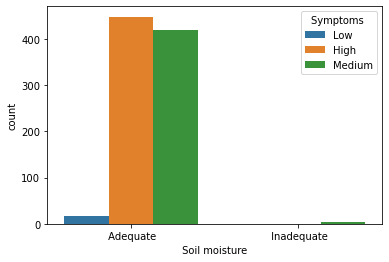

In [13]:
sns.countplot(df[' Soil moisture '],hue=df['Symptoms '])
print(pd.crosstab(df[' Soil moisture '],df['Symptoms ']))

Here, we can see the chances of getting powdery mildew disease is high when the soil moisture is adequate

## Comparison between Temperature and Symptoms:

C:\Users\Konderu Bhavani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Symptoms      High  Low  Medium
Temperature                    
Maximum         42    0      43
Minimum         99    2     243
Moderate       307   14     138


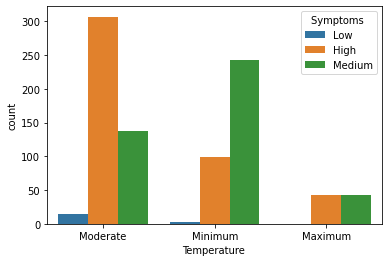

In [14]:
sns.countplot(df['Temperature '],hue=df['Symptoms '])
print(pd.crosstab(df['Temperature '],df['Symptoms ']))

Here, we can see the chances of getting powdery mildew disease is high when the temperature is Moderate and minimum

## Comparison between Humidity and Symptoms:

C:\Users\Konderu Bhavani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Symptoms   High  Low  Medium
 Humidity                   
Maximum     183   16       9
Minimum      20    0     262
Moderate    245    0     153


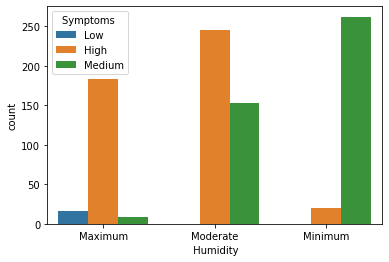

In [15]:
sns.countplot(df[' Humidity'],hue=df['Symptoms '])
print(pd.crosstab(df[' Humidity'],df['Symptoms ']))

Here, we can see the chances of getting powdery mildew disease is high when the Humidity is Maximum and moderate.

## Let's replace the Categorical Variables to Numerical form
The data in Numerical form avoids disturbances in building the model.

In [16]:
df['Symptoms '].replace('Low',0,inplace=True)
df['Symptoms '].replace('Medium',1,inplace=True)
df['Symptoms '].replace('High',2,inplace=True)

In [17]:
df['Temperature '].replace('Moderate',0,inplace=True)
df['Temperature '].replace('Minimum',1,inplace=True)
df['Temperature '].replace('Maximum',2,inplace=True)

In [18]:
df[' Cloud factor '].replace('Open',0,inplace=True)
df[' Cloud factor '].replace('Broken',1,inplace=True)
df[' Cloud factor '].replace('Closed',2,inplace=True)

In [19]:
df[' Soil moisture '].replace(' Adequate',0,inplace=True)
df[' Soil moisture '].replace(' Inadequate',1,inplace=True)

In [20]:
df[' Humidity'].replace('Moderate',0,inplace=True)
df[' Humidity'].replace('Minimum',1,inplace=True)
df[' Humidity'].replace('Maximum',2,inplace=True)

In [21]:
df

,Date,Cloud factor,Soil moisture,Temperature,Humidity,Symptoms
0,01-08-2016,1,0,0,2,0
1,02-08-2016,0,0,0,2,0
2,03-08-2016,0,0,0,2,0
3,04-08-2016,0,0,0,2,0
4,05-08-2016,0,0,0,2,0
...,...,...,...,...,...,...
883,27-03-2020,0,0,0,0,2
884,28-03-2020,2,0,0,0,2
885,29-03-2020,2,0,0,0,2
886,30-03-2020,2,0,0,0,2


## Dropping the date feature as it is not neccesary in bulding model

In [22]:
df.drop('  Date ',axis='columns',inplace=True)

In [23]:
df

,Cloud factor,Soil moisture,Temperature,Humidity,Symptoms
0,1,0,0,2,0
1,0,0,0,2,0
2,0,0,0,2,0
3,0,0,0,2,0
4,0,0,0,2,0
...,...,...,...,...,...
883,0,0,0,0,2
884,2,0,0,0,2
885,2,0,0,0,2
886,2,0,0,0,2


In [24]:
df.shape

(888, 5)

## Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

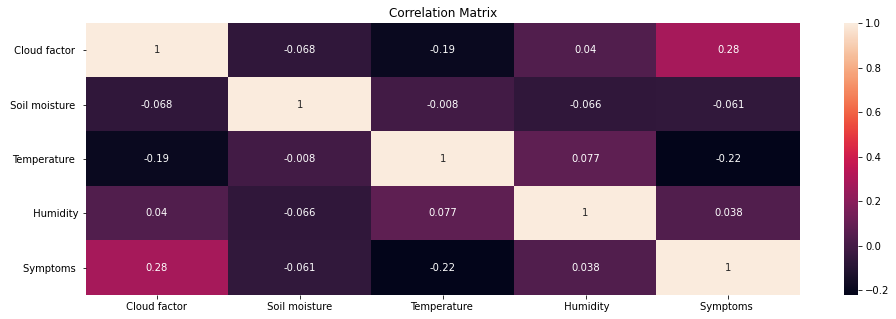

In [25]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

From the above figure, we can see that Symptoms (Independent Variable) has the maximum correlation with Cloud Factor(Dependent Variable). Which denotes that the Symptoms is heavily dependent on the Cloud Factor.

## Splitting the data into Train and Test set

In [26]:
y = df['Symptoms ']
X = df.drop(['Symptoms '], axis = 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

## Logistic Regression (LR)

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_prediction = lr_model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.6910112359550562


## Support Vector Machine (SVM)

In [29]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

svc_prediction = svm_model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.797752808988764


## Decision Tree

In [30]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

dt_prediction = dt_model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.797752808988764


## K-Nearest Neighbors (KNN)

In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

knn_prediction =knn_model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.8089887640449438


## Random Forest

In [32]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

rf_prediction=rf_model.predict(X_test)
print('random forest accuracy = ',metrics.accuracy_score(rf_prediction,y_test))

random forest accuracy =  0.797752808988764


## Conclusion
The K-Nearest Neighbours algorithm gives us the maximum Accuracy (80% approx) compared to the other 4 Machine Learning Classification Algorithms.

In [33]:
import pickle
pickle.dump(knn_model,open('model.pkl','wb'))